In [1]:
pip install sodapy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import os
from sodapy import Socrata

In [3]:
client = Socrata("data.cityofnewyork.us", None)

In [4]:
results = client.get("kpav-sd4t", limit="7000")

In [5]:
results_df = pd.DataFrame.from_records(results)

## Data Clean-up

In [6]:
cleaned_df=results_df.drop_duplicates(subset=['job_id'])

In [7]:
results_df

,job_id,agency,posting_type,number_of_positions,business_title,civil_service_title,title_classification,title_code_no,level,job_category,...,preferred_skills,additional_information,to_apply,residency_requirement,posting_date,posting_updated,process_date,work_location_1,post_until,hours_shift
0,519534,LAW DEPARTMENT,External,1,Secretary to Division Chief - Information Tech...,"LEGAL SECRETARIAL ASST- L2,3,4",Competitive-1,1022A,03,"Technology, Data & Innovation",...,Ability to type a minimum rate of 55 words per...,Additional Information NOTE: This position is ...,To Apply click Apply Now button.,New York City residency is generally required ...,2022-02-09T00:00:00.000,2022-06-28T00:00:00.000,2023-05-02T00:00:00.000,NaN,NaN,NaN
1,584831,DEPT OF PARKS & RECREATION,Internal,1,Software Developer (Digital Media),IT PROJECT SPECIALIST,Non-Competitive-5,95710,00,"Technology, Data & Innovation",...,1. \tTwo (2) or more yearsâ experience codin...,NOTE: All resumes must be received no later th...,Parks Employees:\t 1) From a Parks computer: ...,This position is exempt from NYC residency req...,2023-04-28T00:00:00.000,2023-04-27T00:00:00.000,2023-05-02T00:00:00.000,"Arsenal, Manhattan",26-MAY-2023,NaN
2,584831,DEPT OF PARKS & RECREATION,Internal,1,Software Developer (Digital Media),IT PROJECT SPECIALIST,Non-Competitive-5,95710,00,"Technology, Data & Innovation",...,1. \tTwo (2) or more yearsâ experience codin...,NOTE: All resumes must be received no later th...,Parks Employees:\t 1) From a Parks computer: ...,This position is exempt from NYC residency req...,2023-04-28T00:00:00.000,2023-04-27T00:00:00.000,2023-05-02T00:00:00.000,"Arsenal, Manhattan",26-MAY-2023,NaN
3,554029,OFFICE OF MANAGEMENT & BUDGET,External,1,Analyst Policy and Operations Research,BUDGET ANALYST (OMB),Pending Classification-2,06088,01,"Finance, Accounting, & Procurement Policy, Res...",...,QUALIFICATIONS: â¢\tProficiency in economic...,"REQUIREMENTS: Analyst ($65,604+): Bachelor's ...","For City employees, please go to Employee Self...",New York City residency is generally required ...,2022-10-04T00:00:00.000,2022-10-04T00:00:00.000,2023-05-02T00:00:00.000,255 Greenwich Street,NaN,NaN
4,535465,HRA/DEPT OF SOCIAL SERVICES,External,1,REGIONAL MANAGER,ADMINISTRATIVE JOB OPPORTUNITY,Competitive-1,1024A,M3,Administration & Human Resources Social Services,...,â¢ Exemplary Supervisory leadership and exper...,**LOAN FORGIVENESS The federal government pro...,Must be permanent in the Civil Service title o...,New York City Residency is not required for th...,2022-06-17T00:00:00.000,2022-07-18T00:00:00.000,2023-05-02T00:00:00.000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6224,556506,TAXI & LIMOUSINE COMMISSION,Internal,1,Fleet Supervisor,MOTOR VEHICLE SUPERVISOR,Competitive-1,91232,02,Building Operations & Maintenance,...,2- 3 years of automotive experience that entai...,As a current or prospective employee of the Ci...,"Click, APPLY NOW Current city employees must a...",New York City residency is generally required ...,2022-10-18T00:00:00.000,2023-03-16T00:00:00.000,2023-05-02T00:00:00.000,24-55 Bklyn Qns Expy Woodside,NaN,NaN
6225,577051,BRONX DISTRICT ATTORNEY,External,1,Forensic Analyst,COMMUNITY COORDINATOR,Non-Competitive-5,56058,00,Communications & Intergovernmental Affairs Leg...,...,NaN,NaN,We appreciate your interest in a position with...,City Residency is not required for this position,2023-03-02T00:00:00.000,2023-04-25T00:00:00.000,2023-05-02T00:00:00.000,NaN,29-AUG-2023,NaN
6226,581088,OFFICE OF MANAGEMENT & BUDGET,External,1,Summer College Intern NYCHA,SUMMER COLLEGE INTERN,Non-Competitive-5,10234,00,"Finance, Accounting, & Procurement Policy, Res...",...,QUALIFICATIONS: â¢\tExceptional organization...,REQUIREMENTS: Undergraduate interns must be c...,"Please go to Employee Self Service (ESS), clic...",This is a full time in-person position at OMBâ...,2023-03-31T00:00:00.000,2023-03-31T00:00:00.000,20

In [8]:
updated_df = cleaned_df.drop(['title_classification', 'title_code_no', 'level', 'preferred_skills', 
                              'additional_information', 'to_apply', 'hours_shift', 'work_location_1', 'residency_requirement', 
                              'posting_date', 'posting_updated', 'process_date', 'post_until','division_work_unit', 'job_description', 
                              'minimum_qual_requirements','business_title','full_time_part_time_indicator','work_location'], axis=1)

In [9]:
updated_df

,job_id,agency,posting_type,number_of_positions,civil_service_title,job_category,career_level,salary_range_from,salary_range_to,salary_frequency
0,519534,LAW DEPARTMENT,External,1,"LEGAL SECRETARIAL ASST- L2,3,4","Technology, Data & Innovation",Entry-Level,50000,50000,Annual
1,584831,DEPT OF PARKS & RECREATION,Internal,1,IT PROJECT SPECIALIST,"Technology, Data & Innovation",Experienced (non-manager),90000,100000,Annual
3,554029,OFFICE OF MANAGEMENT & BUDGET,External,1,BUDGET ANALYST (OMB),"Finance, Accounting, & Procurement Policy, Res...",Entry-Level,65604,73806,Annual
4,535465,HRA/DEPT OF SOCIAL SERVICES,External,1,ADMINISTRATIVE JOB OPPORTUNITY,Administration & Human Resources Social Services,Manager,111127,145230,Annual
5,546932,HRA/DEPT OF SOCIAL SERVICES,External,1,COMPUTER SYSTEMS MANAGER,"Technology, Data & Innovation Social Services",Manager,87277,162000,Annual
...,...,...,...,...,...,...,...,...,...,...
6173,565453,POLICE DEPARTMENT,Internal,1,SENIOR POLICE ADMINISTRATIVE A,Administration & Human Resources,Experienced (non-manager),43929,57093,Annual
6177,551133,DEPT OF ENVIRONMENT PROTECTION,Internal,1,ADM MANAGER-NON-MGRL FRM M1/M2,Administration & Human Resources,Experienced (non-manager),74730,130000,Annual
6181,572368,POLICE DEPARTMENT,Internal,1,SENIOR POLICE ADMINISTRATIVE A,Administration & Human Resources Public Safety...,Experienced (non-manager),43929,57093,Annual
6188,583410,POLICE DEPARTMENT,Internal,1,SENIOR POLICE ADMINISTRATIVE A,Administration & Human Resources,Experienced (non-manager),43929,57093,Annual


## Calculations

In [10]:
updated_df['salary_range_from'] = updated_df['salary_range_from'].astype(float)
updated_df['salary_range_to'] = updated_df['salary_range_to'].astype(float)
updated_df['number_of_positions'] = updated_df['number_of_positions'].astype(int)
def calculate_median_salary(row):
    if row['salary_frequency'] == 'Hourly':
        return ((row['salary_range_from'] * 1680) + (row['salary_range_to'] * 1680)) / 2
    elif row['salary_frequency'] == 'Daily':
        return ((row['salary_range_from'] * 240) + (row['salary_range_to'] * 240)) / 2
    elif row['salary_frequency'] == 'Annual' and row['salary_range_from'] == 0:
        return row['salary_range_to']
    elif row['salary_frequency'] == 'Annual' and row['salary_range_from'] > 0:
        return (row['salary_range_from'] + row['salary_range_to']) / 2
    else:
        return None
updated_df['median_salary_annualy'] = updated_df.apply(calculate_median_salary,axis=1)

In [11]:
def job_category_updated(row):
    if "Administration & Human Resources" in row['job_category'] :
        return "Administration & Human Resources"
    elif "Building Operations & Maintenance" in row["job_category"]:
        return "Building Operations & Maintenance"
    elif "Communications & Intergovernmental Affairs" in row["job_category"]:
        return "Communications & Intergovernmental Affairs"
    elif "Constituent Services & Community Programs" in row["job_category"]:
        return "Constituent Services & Community Programs"
    elif "Engineering, Architecture, & Planning" in row["job_category"]:
        return "Engineering, Architecture, & Planning"
    elif "Finance, Accounting, & Procurement" in row["job_category"]:
        return "Finance, Accounting, & Procurement"
    elif "Health" in row["job_category"]:
        return "Health"
    elif "Legal Affairs" in row["job_category"]:
        return "Legal Affairs"
    elif "Policy, Research & Analysis" in row["job_category"]:
        return "Policy, Research & Analysis"
    elif "Public Safety" in row["job_category"]:
        return "Public Safety"
    elif "Technology" in row["job_category"]:
        return "Technology, Data & Innovation"
    elif "Social Services" in row["job_category"]:
        return "Social Services"
    else:
        return None
updated_df['new_category'] = updated_df.apply(job_category_updated,axis=1)

In [12]:
column_c=updated_df.pop("new_category")
updated_df.insert(5,"Job category",column_c)

In [13]:
updated_df.to_excel("NYC_Jobs.xlsx", index=False)

## Running Statistics

In [14]:
min_value = updated_df["median_salary_annualy"].min()

In [15]:
max_value = updated_df["median_salary_annualy"].max()

In [16]:
column_range = max_value-min_value

In [17]:
column_count = updated_df["median_salary_annualy"].count()

In [18]:
std_dev = updated_df['median_salary_annualy'].std()

In [19]:
distribution = updated_df['median_salary_annualy'].value_counts()

In [20]:
dist_df = pd.DataFrame({'value': distribution.index, 'count': distribution.values})

In [21]:
salary_col = updated_df["median_salary_annualy"]

In [22]:
q1 = salary_col.quantile(0.25)
q3 = salary_col.quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr

In [23]:
outliers = salary_col[(salary_col < lower_bound) | (salary_col > upper_bound)]

In [24]:
outliers

18      167500.0
94      164902.0
124     210000.0
214     159969.5
367     167500.0
          ...   
5158    156348.5
5189    174081.5
5269    156348.5
5659    187500.0
5726    180000.0
Name: median_salary_annualy, Length: 64, dtype: float64

In [25]:
out_df = pd.DataFrame({'Index': outliers.index, 'Outliers Values': outliers.values})

## Final Clean-ups

In [26]:
updated_df.rename(columns={'job_id': 'Job ID'}, inplace=True)
updated_df.rename(columns={'agency': 'Agency'}, inplace=True)
updated_df.rename(columns={'posting_type': 'Posting Type'}, inplace=True)
updated_df.rename(columns={'number_of_positions': 'Openings'}, inplace=True)
updated_df.rename(columns={'civil_service_title': 'Job Title'}, inplace=True)
updated_df.rename(columns={'career_level': 'Career level'}, inplace=True)
updated_df.rename(columns={'job_category': 'Job specifics'}, inplace=True)
updated_df.rename(columns={'salary_range_from': 'Minimum Salary'}, inplace=True)
updated_df.rename(columns={'salary_range_to': 'Max Salary'}, inplace=True)
updated_df.rename(columns={'salary_frequency': 'Salary Frequency'}, inplace=True)
updated_df.rename(columns={'median_salary_annualy': 'Annual Median Salary'}, inplace=True)

In [27]:
updated_df

,Job ID,Agency,Posting Type,Openings,Job Title,Job category,Job specifics,Career level,Minimum Salary,Max Salary,Salary Frequency,Annual Median Salary
0,519534,LAW DEPARTMENT,External,1,"LEGAL SECRETARIAL ASST- L2,3,4","Technology, Data & Innovation","Technology, Data & Innovation",Entry-Level,50000.0,50000.0,Annual,50000.0
1,584831,DEPT OF PARKS & RECREATION,Internal,1,IT PROJECT SPECIALIST,"Technology, Data & Innovation","Technology, Data & Innovation",Experienced (non-manager),90000.0,100000.0,Annual,95000.0
3,554029,OFFICE OF MANAGEMENT & BUDGET,External,1,BUDGET ANALYST (OMB),"Finance, Accounting, & Procurement","Finance, Accounting, & Procurement Policy, Res...",Entry-Level,65604.0,73806.0,Annual,69705.0
4,535465,HRA/DEPT OF SOCIAL SERVICES,External,1,ADMINISTRATIVE JOB OPPORTUNITY,Administration & Human Resources,Administration & Human Resources Social Services,Manager,111127.0,145230.0,Annual,128178.5
5,546932,HRA/DEPT OF SOCIAL SERVICES,External,1,COMPUTER SYSTEMS MANAGER,"Technology, Data & Innovation","Technology, Data & Innovation Social Services",Manager,87277.0,162000.0,Annual,124638.5
...,...,...,...,...,...,...,...,...,...,...,...,...
6173,565453,POLICE DEPARTMENT,Internal,1,SENIOR POLICE ADMINISTRATIVE A,Administration & Human Resources,Administration & Human Resources,Experienced (non-manager),43929.0,57093.0,Annual,50511.0
6177,551133,DEPT OF ENVIRONMENT PROTECTION,Internal,1,ADM MANAGER-NON-MGRL FRM M1/M2,Administration & Human Resources,Administration & Human Resources,Experienced (non-manager),74730.0,130000.0,Annual,102365.0
6181,572368,POLICE DEPARTMENT,Internal,1,SENIOR POLICE ADMINISTRATIVE A,Administration & Human Resources,Administration & Human Resources Public Safety...,Experienced (non-manager),43929.0,57093.0,Annual,50511.0
6188,583410,POLICE DEPARTMENT,Internal,1,SENIOR POLICE ADMINISTRATIVE A,Administration & Human Resources,Administration & Human Resources,Experienced (non-manager),43929.0,57093.0,Annual,50511.0


In [28]:
updated_df.to_excel("NYC_Jobs.xlsx", index=False)

In [29]:
new_df = pd.DataFrame({'Min Value': [min_value], 'Max Value': [max_value], "Count": [column_count], "Standard deviation": [std_dev]})

In [30]:
with pd.ExcelWriter('NYC_Jobs.xlsx', mode='a') as writer:
    new_df.to_excel(writer, sheet_name='Basic Stats', index=False)
    dist_df.to_excel(writer, sheet_name='Distribution', index=False)
    out_df.to_excel(writer, sheet_name='Outliers', index=False)

## Exporting Final data to .csv

In [31]:
df = pd.read_excel('NYC_Jobs.xlsx')
df.to_csv('NYC_jobs.csv', index=False)

## Creating Visuals Using Seaborn

In [32]:
import seaborn as sns

In [33]:
import matplotlib.pyplot as plt

In [34]:
df = pd.read_excel('NYC_Jobs.xlsx')

In [35]:
df

,Job ID,Agency,Posting Type,Openings,Job Title,Job category,Job specifics,Career level,Minimum Salary,Max Salary,Salary Frequency,Annual Median Salary
0,519534,LAW DEPARTMENT,External,1,"LEGAL SECRETARIAL ASST- L2,3,4","Technology, Data & Innovation","Technology, Data & Innovation",Entry-Level,50000.0,50000.0,Annual,50000.0
1,584831,DEPT OF PARKS & RECREATION,Internal,1,IT PROJECT SPECIALIST,"Technology, Data & Innovation","Technology, Data & Innovation",Experienced (non-manager),90000.0,100000.0,Annual,95000.0
2,554029,OFFICE OF MANAGEMENT & BUDGET,External,1,BUDGET ANALYST (OMB),"Finance, Accounting, & Procurement","Finance, Accounting, & Procurement Policy, Res...",Entry-Level,65604.0,73806.0,Annual,69705.0
3,535465,HRA/DEPT OF SOCIAL SERVICES,External,1,ADMINISTRATIVE JOB OPPORTUNITY,Administration & Human Resources,Administration & Human Resources Social Services,Manager,111127.0,145230.0,Annual,128178.5
4,546932,HRA/DEPT OF SOCIAL SERVICES,External,1,COMPUTER SYSTEMS MANAGER,"Technology, Data & Innovation","Technology, Data & Innovation Social Services",Manager,87277.0,162000.0,Annual,124638.5
...,...,...,...,...,...,...,...,...,...,...,...,...
3178,565453,POLICE DEPARTMENT,Internal,1,SENIOR POLICE ADMINISTRATIVE A,Administration & Human Resources,Administration & Human Resources,Experienced (non-manager),43929.0,57093.0,Annual,50511.0
3179,551133,DEPT OF ENVIRONMENT PROTECTION,Internal,1,ADM MANAGER-NON-MGRL FRM M1/M2,Administration & Human Resources,Administration & Human Resources,Experienced (non-manager),74730.0,130000.0,Annual,102365.0
3180,572368,POLICE DEPARTMENT,Internal,1,SENIOR POLICE ADMINISTRATIVE A,Administration & Human Resources,Administration & Human Resources Public Safety...,Experienced (non-manager),43929.0,57093.0,Annual,50511.0
3181,583410,POLICE DEPARTMENT,Internal,1,SENIOR POLICE ADMINISTRATIVE A,Administration & Human Resources,Administration & Human Resources,Experienced (non-manager),43929.0,57093.0,Annual,50511.0


## Count of Openings in Specfic Job Categories

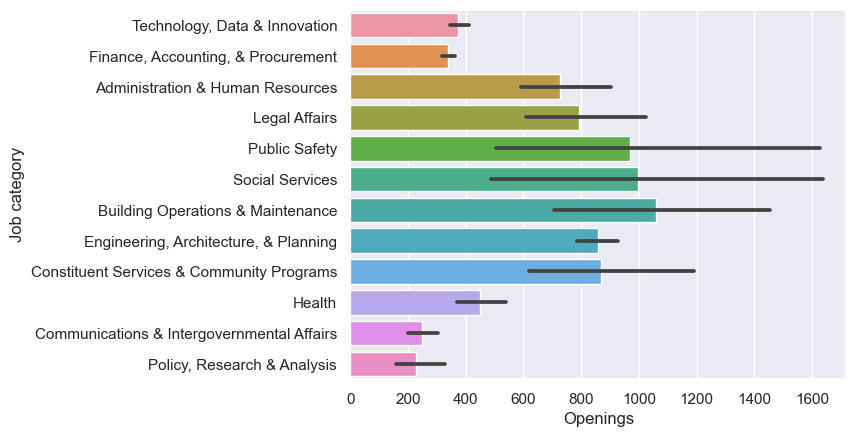

In [36]:
sns.set(style="darkgrid")
ax = sns.barplot(y="Job category", x="Openings", data=updated_df, estimator=sum)
ax.set_xlabel("Openings")
plt.show()


## Annual Median Salary for Job Categories


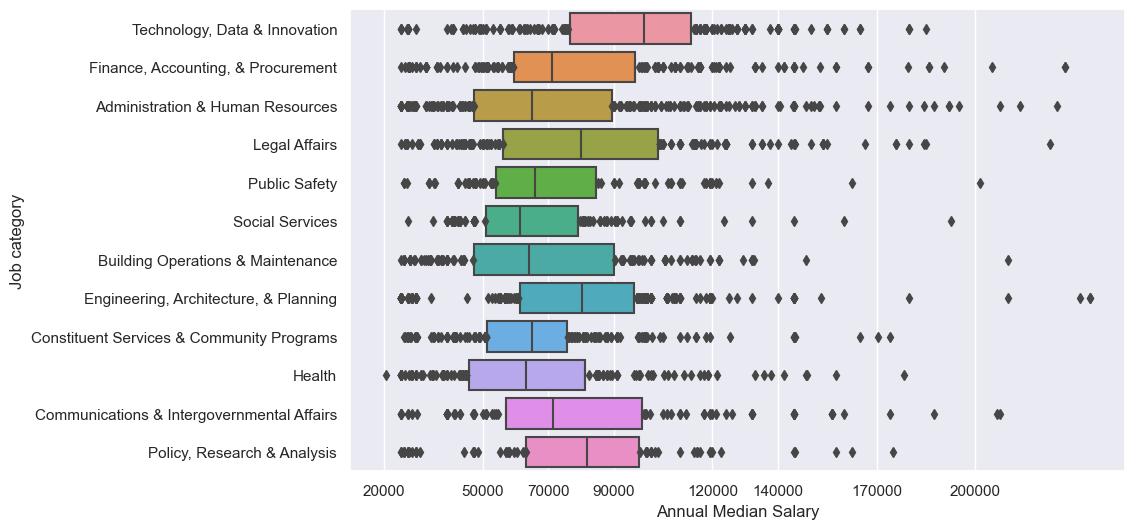

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x="Annual Median Salary", y="Job category", data=updated_df, whis=0)
plt.xticks([20000, 50000, 70000, 90000, 120000, 140000, 170000, 200000])
plt.show()

## Annual Median Salary for Career Levels

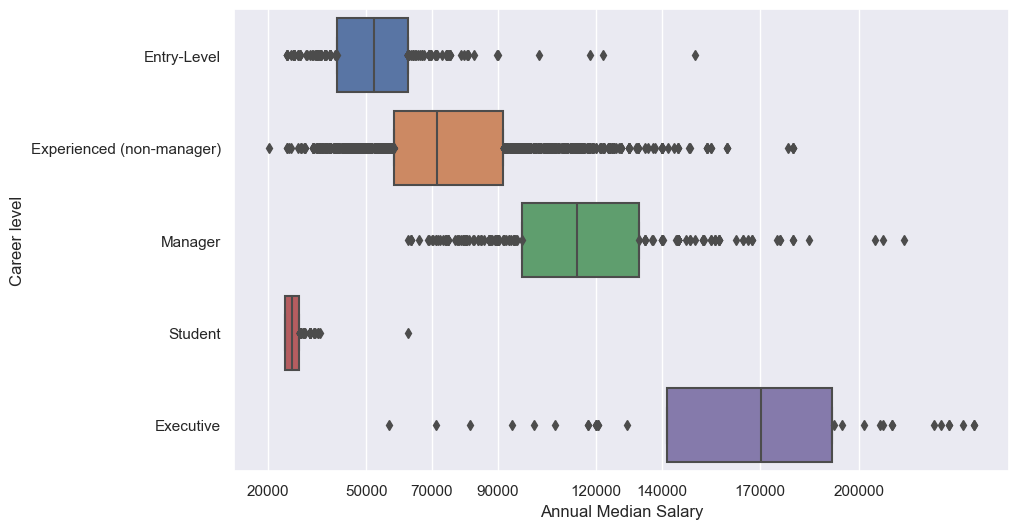

In [38]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x="Annual Median Salary", y="Career level", data=updated_df, whis=0) 
plt.xticks([20000, 50000, 70000, 90000, 120000, 140000, 170000, 200000])

plt.show()


## Count of Posting Type by Career Level

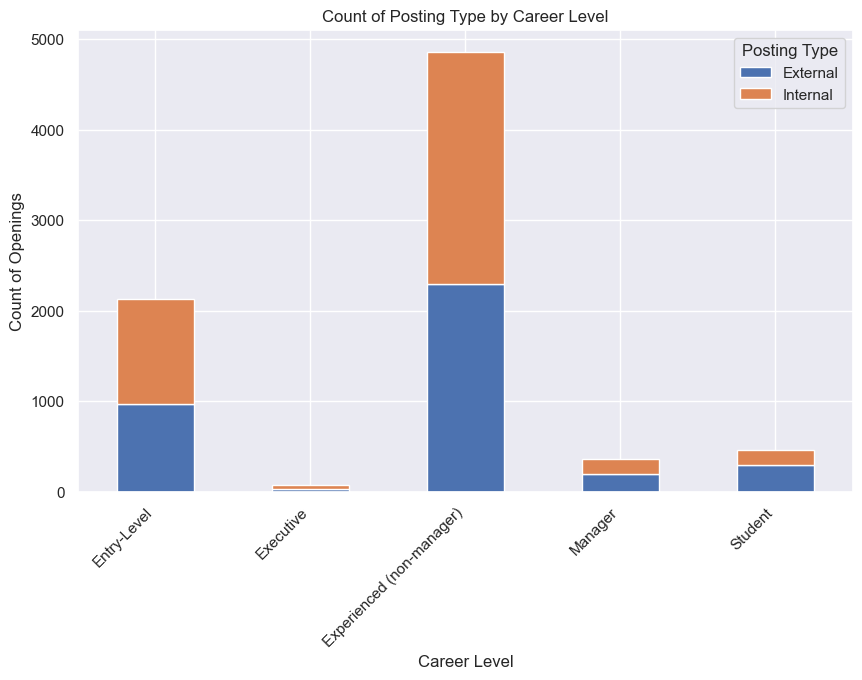

In [39]:
pivot_df = pd.pivot_table(data=updated_df, index="Career level", columns="Posting Type", values="Openings", aggfunc="sum", fill_value=0)

# plot the stacked bar plot
pivot_df.plot(kind="bar", stacked=True, figsize=(10,6))

# set labels and title
plt.xlabel("Career Level")
plt.ylabel("Count of Openings")
plt.title("Count of Posting Type by Career Level")

plt.xticks(rotation=45, ha="right")

# show the plot
plt.show()

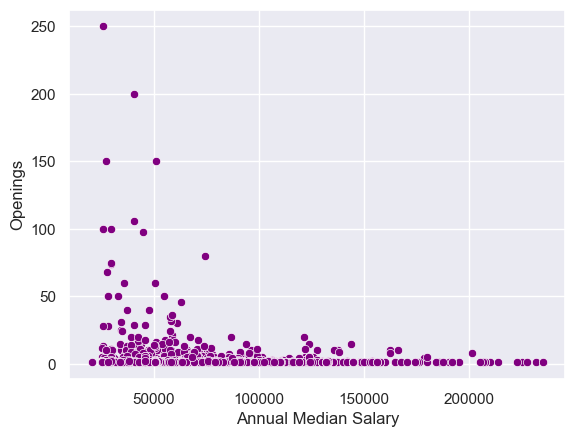

In [41]:
sns.set(style="darkgrid")
sns.scatterplot(x='Annual Median Salary', y='Openings', data=df, color='purple')
plt.show()

In [44]:
grouped = df.groupby(['Job category', pd.cut(df['Minimum Salary'], bins=range(0, 150000, 10000))])
counted = grouped['Openings'].count().reset_index()
pivoted = counted.pivot(index='Job category', columns='Minimum Salary', values='Openings')

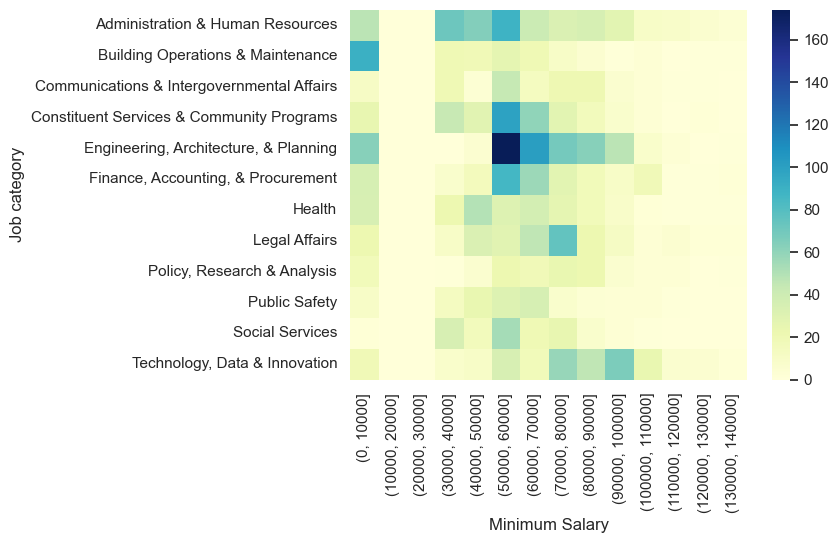

In [46]:
sns.heatmap(pivoted, cmap='YlGnBu')
plt.show()

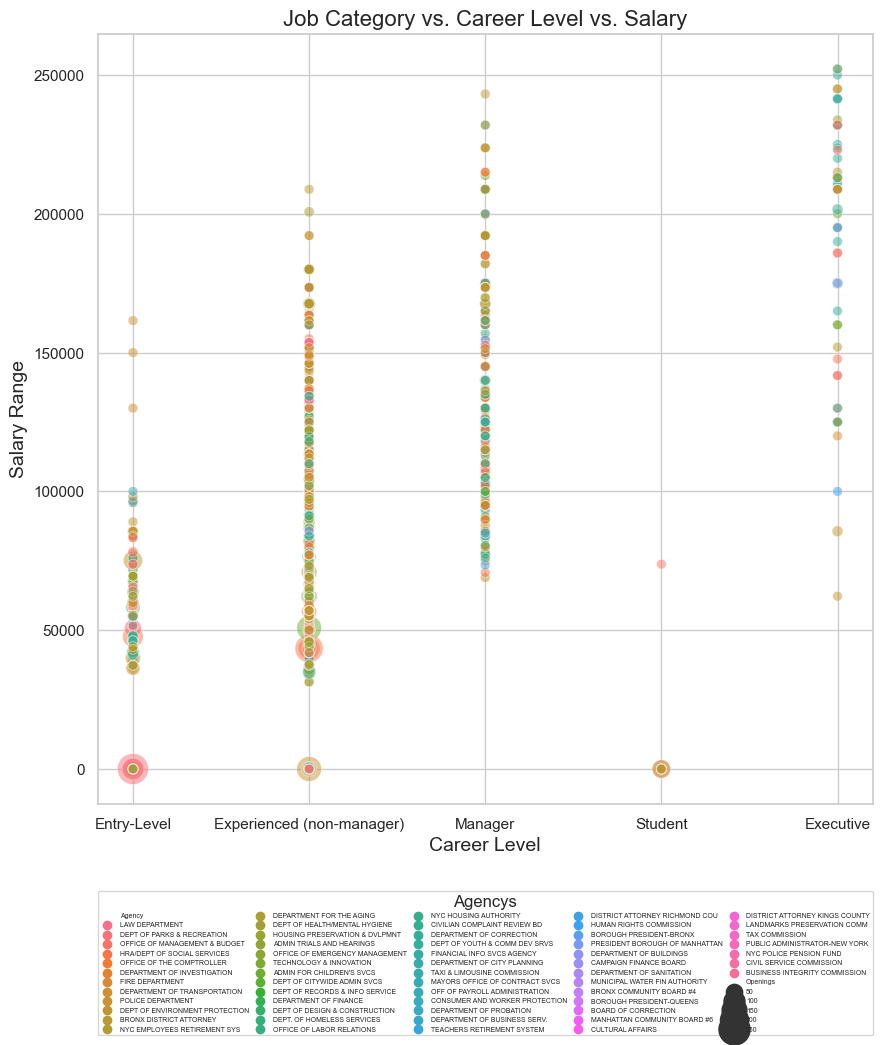

In [50]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10 , 10))
sns.scatterplot(x='Career level', y='Max Salary', data=df, hue='Agency', size='Openings', sizes=(50, 500), alpha=0.5, ax=ax, legend="brief")

plt.title("Job Category vs. Career Level vs. Salary", fontsize=16)
plt.xlabel("Career Level", fontsize=14)

plt.show()